<br>
<img src="data/airbnb_logo.png" alt="Logo de Airbnb" style="width:300px"/><br>

# **Airbnb Case**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: ggalvanjorge@gmail.com

---
## **Agregación de datos y búsqueda de insights**

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lectura del dataset
df_listings = pd.read_csv('./data/listings_clean.csv')
df_listings = df_listings.drop('Unnamed: 0', axis='columns') # Eliminación de la columna 'Unnamed: 0'

### **6 - Puntuación de los barrios en base a la localización**

#### 6.1 - Barrios con mejor puntuación en cuanto a la localización

In [3]:
# Barrios con mejor puntuación de localización
df_listings.groupby('neighbourhood_cleansed').agg({'review_scores_location':'mean'}).sort_values(by='review_scores_location', ascending=False).reset_index().head()

,neighbourhood_cleansed,review_scores_location
0,Centrum-West,4.934085
1,Centrum-Oost,4.906310
2,De Pijp - Rivierenbuurt,4.852902
3,Zuid,4.825494
4,De Baarsjes - Oud-West,4.809262


#### 6.2 - Puntuación media de la localización de las viviendas de los barrios con mayor oferta

In [4]:
# Nº de viviendas por barrio para analizar la puntuación de los barrios con más viviendas
df_neighbourhood_top = df_listings['neighbourhood_cleansed'].value_counts().reset_index()
df_neighbourhood_top = df_neighbourhood_top.rename({'index':'neighbourhood', 'neighbourhood_cleansed':'count'}, axis='columns')

# Selección de barrios con más de 200 viviendas
cond = df_neighbourhood_top['count'] > 200

df_neighbourhood_top = df_neighbourhood_top[cond]
df_neighbourhood_top

,neighbourhood,count
0,De Baarsjes - Oud-West,610
1,Centrum-West,563
2,De Pijp - Rivierenbuurt,448
3,Centrum-Oost,420
4,Westerpark,264
5,Zuid,253
6,Oud-Oost,231


In [5]:
# Lista con los barrios con más de 200 viviendas
list_neighbourhood_top = df_neighbourhood_top.loc[:,'neighbourhood'].tolist()
list_neighbourhood_top

['De Baarsjes - Oud-West',
 'Centrum-West',
 'De Pijp - Rivierenbuurt',
 'Centrum-Oost',
 'Westerpark',
 'Zuid',
 'Oud-Oost']

In [6]:
# Condiciones para filtrar por los dos tipos de habitaciones más habituales y por la lista de los barrios con más viviendas
cond_1 = df_listings['room_type'].isin(['Entire home/apt','Private room'])
cond_2 = df_listings['neighbourhood_cleansed'].isin(list_neighbourhood_top)

df_neighbourhood_top = df_listings[cond_1 & cond_2]

In [7]:
# Puntuación media de la localización tras agrupar por barrio y por tipo de habitación
df_neighbourhood_top.groupby(['neighbourhood_cleansed','room_type']).agg({'review_scores_location':'mean'}).sort_values(by = 'review_scores_location', ascending = False)

review_scores_location
neighbourhood_cleansed  room_type                              
Centrum-West            Entire home/apt                4.948272
                        Private room                   4.922092
Centrum-Oost            Entire home/apt                4.910661
                        Private room                   4.899516
De Pijp - Rivierenbuurt Entire home/apt                4.871622
De Baarsjes - Oud-West  Entire home/apt                4.833642
Zuid                    Entire home/apt                4.828079
                        Private room                   4.816338
De Pijp - Rivierenbuurt Private room                   4.802095
Westerpark              Entire home/apt                4.790383
Oud-Oost                Entire home/apt                4.777403
                        Private room                   4.759302
Westerpark              Private room                   4.749216
De Baarsjes - Oud-West  Private room                   4.730074

### **7 - Evolución del precio mediano por barrio**

#### 7.1 - Serie temporal de la mediana del precio por barrio

In [8]:
# Lectura del dataset de propiedades y el de calendario
df_listings = pd.read_csv('./data/listings (1).csv')
df_calendar = pd.read_csv('./data/calendar.csv')

In [9]:
# Transformación de la variable 'date' a tipo fecha
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')

# Transformación de la variable 'price' del dataset de calendario
df_calendar['price'] = df_calendar['price'].str.replace('$','') # Eliminación del símbolo $
df_calendar['price'] = df_calendar['price'].str.replace(',','') # Eliminación del separador de miles
df_calendar['price'] = df_calendar['price'].astype(float) # Conversión de la variable a tipo float

df_calendar['price'].head()

0    49.0
1    49.0
2    49.0
3    49.0
4    49.0
Name: price, dtype: float64

In [10]:
# Combinación de los dos datasets seleccionando las columnas necesarias para el análisis
df_new_listings = df_calendar[['listing_id','date','price']].merge(df_listings[['neighbourhood','id']], how='left', left_on='listing_id', right_on = 'id')

In [11]:
# Mediana del precio por barrio y por día
df_neighbourhood_price = df_new_listings.groupby(['neighbourhood','date']).agg({'price':'median'}).reset_index()
df_neighbourhood_price.sample(5)

,neighbourhood,date,price
1986,Centrum-West,2023-02-15,198.0
1498,Centrum-Oost,2022-10-15,212.5
1192,Buitenveldert - Zuidas,2022-12-13,162.5
3379,Gaasperdam - Driemond,2022-12-07,100.0
4830,Noord-West,2022-11-28,150.0


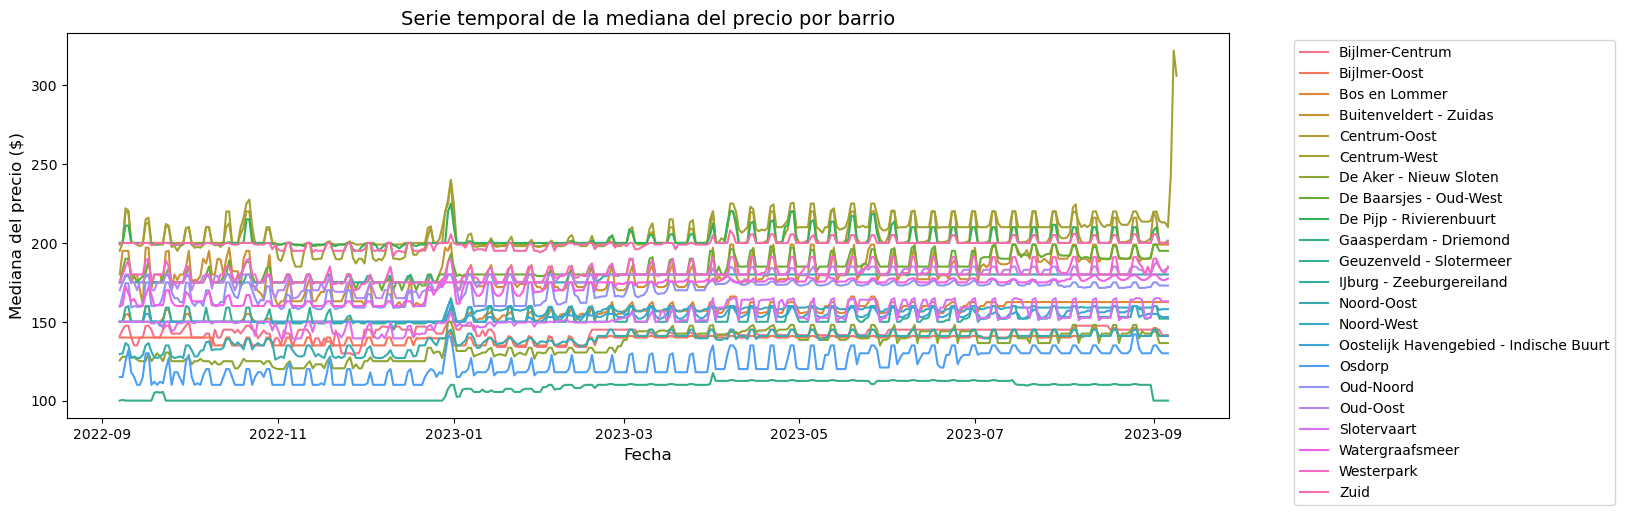

In [12]:
# Serie temporal con la evolución de la mediana del precio por barrio
fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(x='date', y='price', data=df_neighbourhood_price, hue='neighbourhood')

# Título y etiquetas de los ejes
plt.title('Serie temporal de la mediana del precio por barrio', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Mediana del precio ($)', fontsize=12)

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left') # Ubicar leyenda fuera del gráfico

plt.show()

#### 7.2 - Serie temporal de la mediana del precio por los barrios con mayor oferta

In [13]:
# Condición para filtrar por los barrios con más viviendas
cond = df_neighbourhood_price.neighbourhood.isin(list_neighbourhood_top)

df_neighbourhood_price = df_neighbourhood_price[cond]

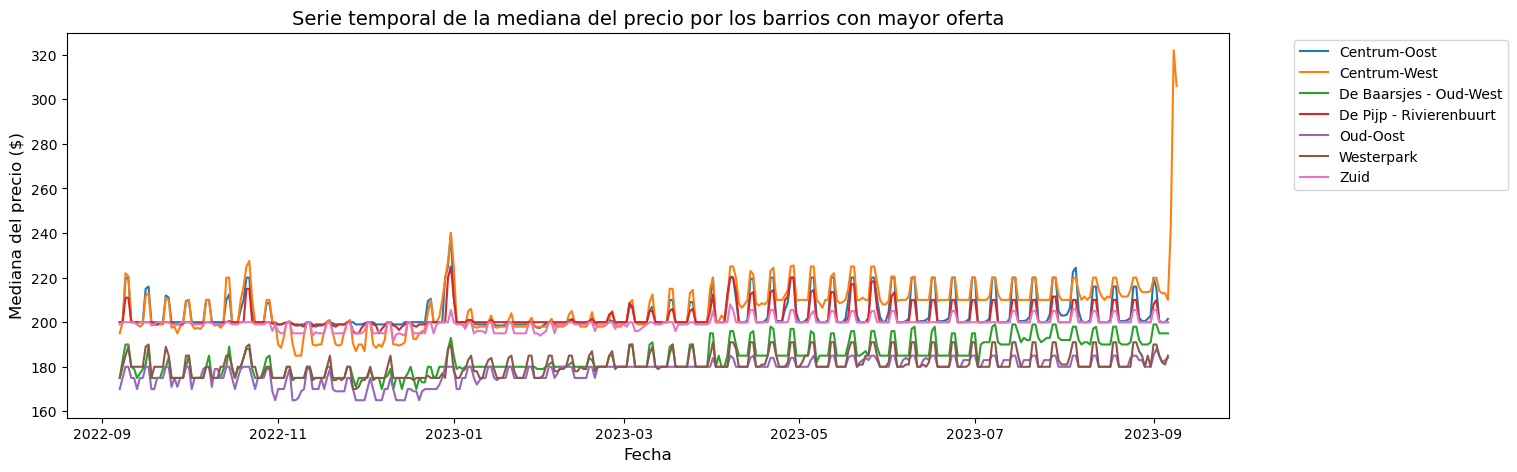

In [14]:
# Serie temporal con la evolución de la mediana del precio por los barrios con más viviendas
fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(x='date', y='price', data=df_neighbourhood_price, hue='neighbourhood');

# Título y etiquetas de los ejes
plt.title('Serie temporal de la mediana del precio por los barrios con mayor oferta', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Mediana del precio ($)', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Ubicar leyenda fuera del gráfico

plt.show()